**Using YOLOv7, we detect cars in images and then apply the OpenCV GrabCut algorithm to extract the car within the bounding box obtained from YOLOv7.**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import random
from collections import defaultdict
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/yolov5_Fish_Detection

/content/drive/MyDrive/yolov5_Fish_Detection


In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection


# Reinstall these respective packages

In [ ]:
!sudo apt-get install libx11-xcb1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libx11-xcb1 is already the newest version (2:1.6.9-2ubuntu1.2).
libx11-xcb1 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,697 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 x11-xkb-utils amd64 7.7+5 [158 kB]
Get:5 http://archive.ubuntu.com/ubunt

In [ ]:
!apt-get install -y xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!pip list | grep Qt

In [ ]:
!pwd

In [ ]:
%cd yolov7

# Model Training

In [ ]:
!python train.py --workers 1 --device 0 --batch-size 4 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --weights yolov7.pt

In [ ]:
!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --weights yolov7.pt

YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/coco.yaml', device='0', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7-custom', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7-custom10', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=1, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-04 17:45:06.902337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with

In [ ]:
!python yolov7/detect.py --weights yolov7/runs/train/yolov7-custom/weights/best.pt --conf 0.5 --img-size 640 --source yolov7/data/val/7.png --view-img --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='yolov7/data/val/7.png', update=False, view_img=True, weights=['yolov7/runs/train/yolov7-custom/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (36.3ms) Inference, (0.5ms) NMS
 The image with the result is saved in: runs/de

In [ ]:
!python detect_custom.py --weights runs/train/yolov7-custom/weights/best.pt --img-size 640 --conf 0.5 --source data/val/20.png --save-txt

python3: can't open file 'detect_custom.py': [Errno 2] No such file or directory


In [ ]:
!python yolov7/detect_custom.py --weights yolov7/runs/train/yolov7-custom/weights/best.pt --conf 0.5 --img-size 640 --source yolov7/data/val/images/39.png --view-img --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='yolov7/data/val/images/39.png', update=False, view_img=True, weights=['yolov7/runs/train/yolov7-custom/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (18.3ms) Inference, (13.5ms) NMS
qt.qpa.xcb: could not connect to displ

In [ ]:
!python yolov7/detect.py --weights yolov7/runs/train/yolov7-custom/weights/best.pt --conf 0.5 --img-size 640 --source yolov7/data/val/images/23.png --view-img --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='yolov7/data/val/images/23.png', update=False, view_img=True, weights=['yolov7/runs/train/yolov7-custom/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (33.4ms) Inference, (0.5ms) NMS
 The image with the result is saved in:

In [ ]:
!python yolov7/detect.py --weights yolov7/runs/train/yolov7-custom/weights/best.pt --conf 0.5 --img-size 640 --source yolov7/data/val/images/39.png --view-img --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='yolov7/data/val/images/39.png', update=False, view_img=True, weights=['yolov7/runs/train/yolov7-custom/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (26.5ms) Inference, (0.5ms) NMS
 The image with the result is saved in:

# Validation

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.01 --img-size 640 --source SAM_5581.JPG --view-img

Namespace(weights=['yolov7/model/best.pt'], source='SAM_5581.JPG', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (2486.7ms) Inference, (0.5ms) NMS
 The image with the res

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/10.png --view-img

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/10.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Black Sea Sprat, Done. (1898.2ms) Inference

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/2.png --view-img

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/2.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Black Sea Sprat, Done. (2953.6ms) Inference,

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.01 --img-size 640 --source yolov7/data/val/images/3.png --view-img

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/3.png', img_size=640, conf_thres=0.01, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Black Sea Sprat, 1 Striped Red Mullet, Done.

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.01 --img-size 640 --source yolov7/data/val/images/7.png --view-img

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/7.png', img_size=640, conf_thres=0.01, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Black Sea Sprat, 1 Gilt-Head Bream, 1 Stripe

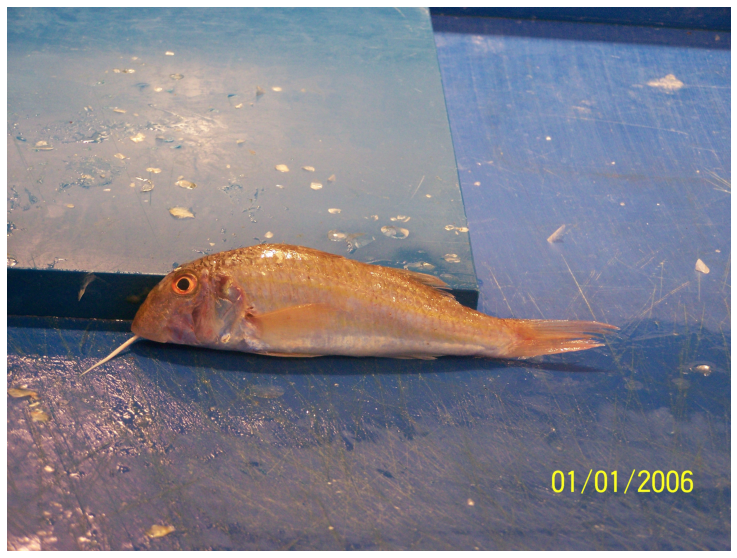

In [ ]:
imShow("runs/detect/exp26/3.png")

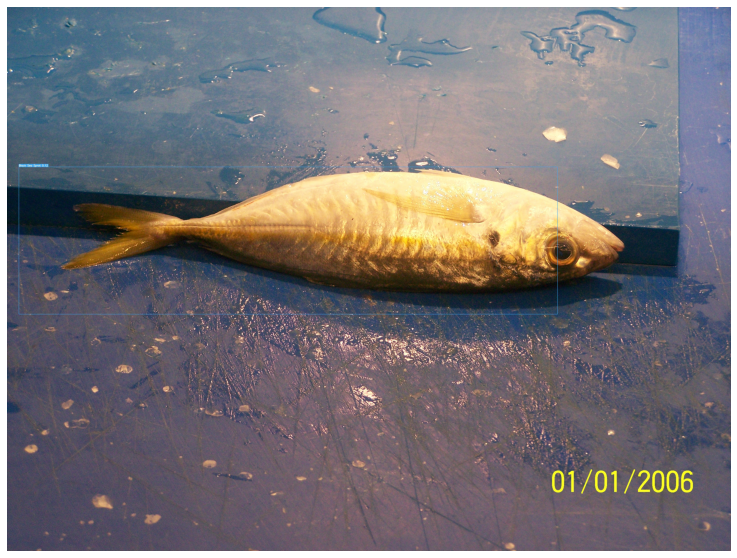

In [ ]:
imShow("runs/detect/exp24/2.png")

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

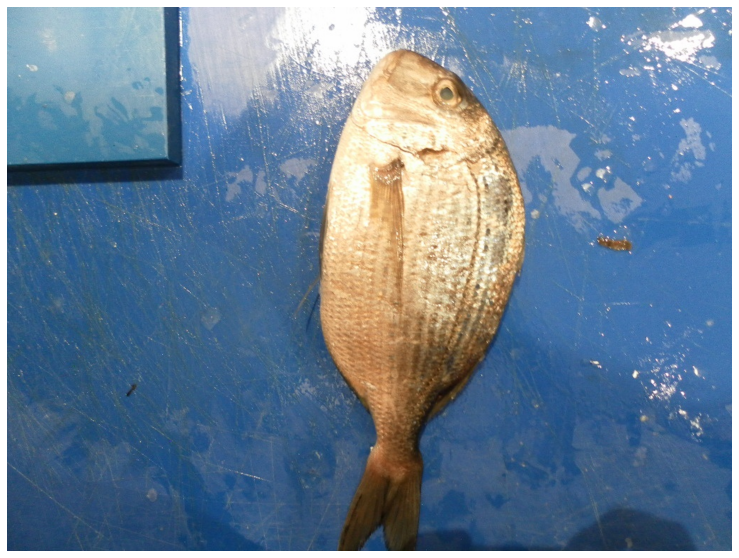

In [ ]:
imShow("runs/detect/exp19/SAM_5581.JPG")

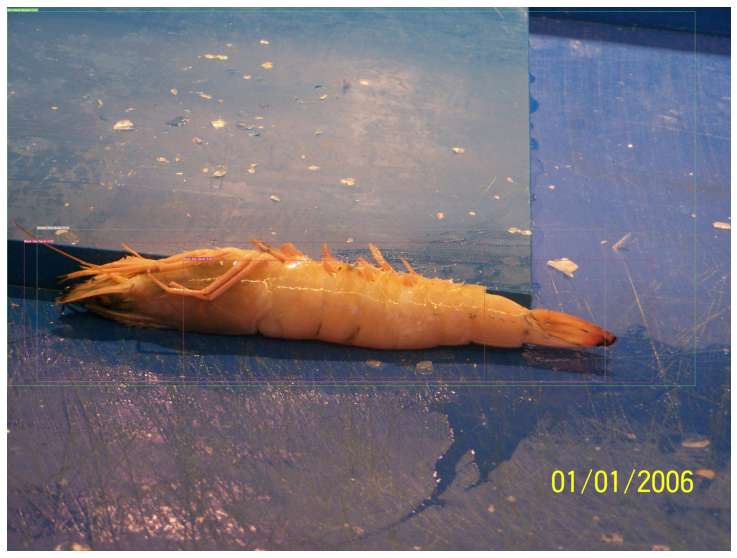

In [ ]:
imShow('runs/detect/exp20/10.png')

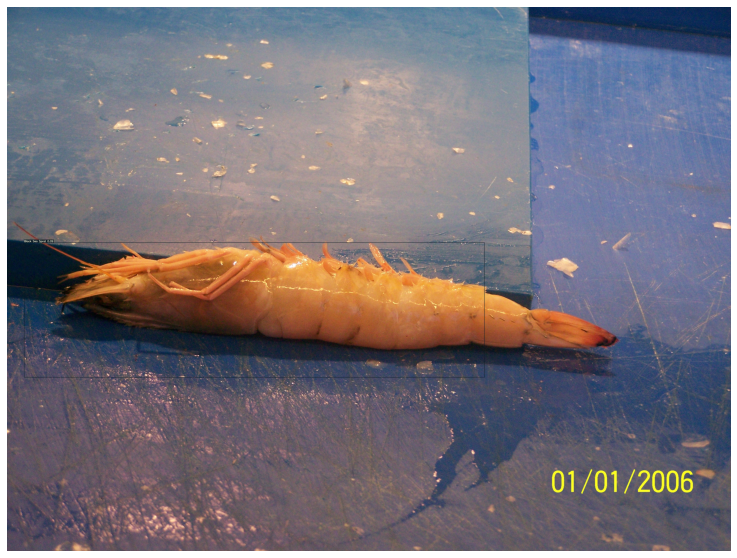

In [ ]:
imShow('runs/detect/exp21/10.png')

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/8.png --save-txt --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/8.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Gilt-Head Bream, Done. (1484.2ms) Inference, (1.9ms) NMS
 The image with the result is saved in: runs/detect/exp30/8.png
Done. (1.

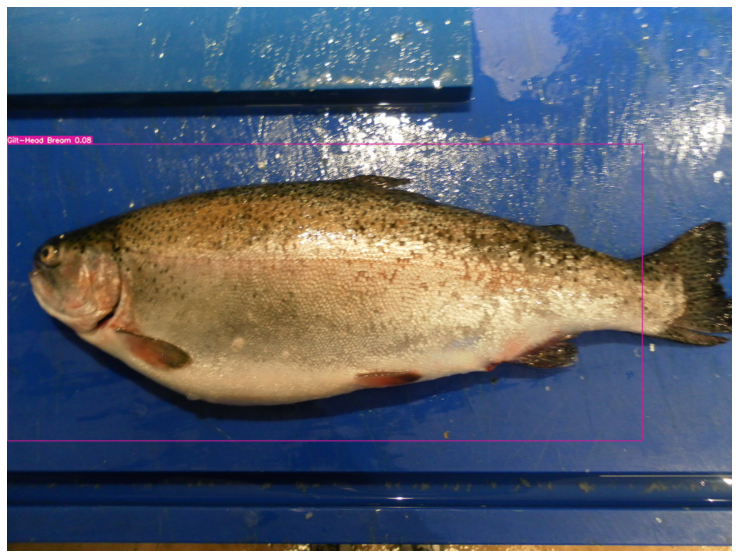

In [ ]:
imShow('runs/detect/exp30/8.png')

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.01 --img-size 640 --source yolov7/data/val/images/45.png --view-img

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/45.png', img_size=640, conf_thres=0.01, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Gilt-Head Bream, 2 Striped Red Mullets, Don

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.01 --img-size 640 --source yolov7/data/val/images/42.JPG --view-img --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/42.JPG', img_size=640, conf_thres=0.01, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Black Sea Sprat, 1 Striped Red Mullet, Done. (1538.3ms) Inference, (1.5ms) NMS
 The image with the result is saved in: runs/detec

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.01 --img-size 640 --source yolov7/data/val/images/50.png --view-img --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/50.png', img_size=640, conf_thres=0.01, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
2 Black Sea Sprats, 1 Striped Red Mullet, Done. (18.6ms) Inference, (35.9ms) NMS
 The image with the re

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.01 --img-size 640 --source yolov7/data/val/images/34.png --view-img --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/34.png', img_size=640, conf_thres=0.01, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
Traceback (most recent call last):
  File "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/detect_custom.py", line 196, in <module>
    detect()
  File "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/detect_custom.py", line 57, in detect
    dataset = LoadImages(source, img_size=imgsz, stride=stride)
  File "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/utils/datasets.py", line 138, in __init__
 

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.01 --img-size 640 --source yolov7/data/val/images/34.JPG --view-img --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/34.JPG', img_size=640, conf_thres=0.01, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Black Sea Sprat, 1 Gilt-Head Bream, 1 Striped Red Mullet, Done. (18.3ms) Inference, (1.5ms) NMS
 The 

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.04 --img-size 640 --source yolov7/data/val/images/17.png --view-img --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/17.png', img_size=640, conf_thres=0.04, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Striped Red Mullet, Done. (18.8ms) Inference, (1.5ms) NMS
 The image with the result is saved in: run

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/41.png --view-img --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/41.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Gilt-Head Bream, Done. (20.1ms) Inference, (2.3ms) NMS
 The image with the result is saved in: runs/d

In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/43.png --view-img --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/43.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Black Sea Sprat, Done. (19.0ms) Inference, (1.9ms) NMS
 The image with the result is saved in: runs/d

In [ ]:
#python train.py --weights yolov7-e6e.pt --data data/masks.yaml --workers 1 --batch-size 4 --img 416 --cfg cfg/training/yolov7-masks.yaml --name yolov7 --epochs 50

## Final Train

In [ ]:
!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --weights yolov7.pt

python3: can't open file 'train.py': [Errno 2] No such file or directory


In [ ]:
!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --weights yolov7.pt

python3: can't open file 'train.py': [Errno 2] No such file or directory


In [ ]:
!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --weights yolov7.pt

YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/coco.yaml', device='0', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7-custom', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7-custom3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=1, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-05 10:38:49.663718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with 

In [ ]:
!python train.py --weights runs/train/yolov7-custom3/weights/last.pt --resume

Resuming training from ./runs/train/yolov7-custom3/weights/last.pt
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/coco.yaml', device='0', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7-custom', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=True, save_dir='runs/train/yolov7-custom3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='./runs/train/yolov7-custom3/weights/last.pt', workers=1, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-05 13:16:24.21

In [ ]:
!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --weights yolov7.pt

python3: can't open file 'train.py': [Errno 2] No such file or directory


# Image Segmentation

In [ ]:
import torch

In [ ]:
%cd /content/drive/MyDrive/yolov5_Fish_Detection/yolov7

/content/drive/MyDrive/yolov5_Fish_Detection/yolov7


In [ ]:
# load model
import torch.hub
model = torch.hub.load('', 'custom', 'model/best.pt', source = 'local',force_reload=True)

In [ ]:
input_tensor = torch.randn(1, 3, 640,640)
output = model(input_tensor)

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
from hubconf import custom
model = custom(path_or_model='model/best.pt')  # custom example
# model = create(name='yolov7', pretrained=True, channels=3, classes=80, autoshape=True)  # pretrained example

# Verify inference
import numpy as np
from PIL import Image

imgs = [np.zeros((590,445, 3))]

results = model(imgs)  # batched inference
results.print()
results.save()

In [ ]:
def custom(path_or_model='model/best.pt', autoshape=True):
    """custom mode

    Arguments (3 options):
        path_or_model (str): 'path/to/model.pt'
        path_or_model (dict): torch.load('path/to/model.pt')
        path_or_model (nn.Module): torch.load('path/to/model.pt')['model']

    Returns:
        pytorch model
    """
    model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(path_or_model, str) else path_or_model  # load checkpoint
    if isinstance(model, dict):
        model = model['ema' if model.get('ema') else 'model']  # load model

    hub_model = Model(model.yaml).to(next(model.parameters()).device)  # create
    hub_model.load_state_dict(model.float().state_dict())  # load state_dict
    hub_model.names = model.names  # class names
    if autoshape:
        hub_model = hub_model.autoshape()  # for file/URI/PIL/cv2/np inputs and NMS
    device = select_device('0' if torch.cuda.is_available() else 'cpu')  # default to GPU if available
    return hub_model.to(device)


In [ ]:
model = custom(path_or_model='model/best.pt')  # custom example
# model = create(name='yolov7', pretrained=True, channels=3, classes=80, autoshape=True)  # pretrained example

# Verify inference
import numpy as np
from PIL import Image

imgs = [np.zeros((590, 445, 3))]

results = model(imgs)  # batched inference
results.print()
results.save()


In [ ]:
df_prediction = results.pandas().xyxy
df_prediction

In [ ]:
model

In [ ]:
res = model('data/val/images/34.JPG').pandas().xyxy[0]

In [ ]:
res

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []

In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection/yolov7


In [ ]:
model("data/val/images/1.png").pandas().xyxy[0]

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []

In [ ]:
for i in range(1,18):
  res = model("data/val/images/{}.png".format(i))
  df_prediction.append(res)


FileNotFoundError: ignored

In [ ]:
df_prediction

NameError: ignored

In [ ]:
base_path = 'data/val/images/'
for i in range(1,51):
  model(base_path + "")

In [ ]:
res = model('SAM_5581.JPG').pandas().xyxy[0]

In [ ]:
res

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []

In [ ]:
!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --data data/custom-data.yaml --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --cfg cfg/training/yolov7-custom.yaml --weights yolov7.pt

YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7-custom.yaml', data='data/custom-data.yaml', device='0', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7-custom', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7-custom', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=1, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-07 14:30:43.201124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This

  # Grabcut

# Generate Data Frame with bounding boxes

In [ ]:
%cd yolov7

/content/drive/MyDrive/yolov5_Fish_Detection/yolov7


In [ ]:
import os
def load_image():
    base_path = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/labels"
    bbox_lis = []
    dir = base_path
    label = []
    path = []
    for dirname, _,filenames in os.walk(dir):
      for ele in filenames:
        if ele == 'classes.txt':
          break
        print(ele)
        with open(base_path+"/"+ele,'r') as f:
          data = f.readlines()
          bbox_lis.append(data)
    return bbox_lis
print("Appended list")

Appended list


In [ ]:
bbox_lis = load_image()

10.txt
8.txt
16.txt
11.txt
14.txt
7.txt
4.txt
13.txt
19.txt
6.txt
15.txt
9.txt
5.txt
50.txt
17.txt
3.txt
2.txt
1.txt
18.txt
12.txt
40.txt
33.txt
43.txt
49.txt
26.txt
29.txt
20.txt
44.txt
27.txt
39.txt
34.txt
25.txt
23.txt
30.txt
47.txt
46.txt
31.txt
32.txt
24.txt
35.txt
37.txt
38.txt
45.txt
42.txt
21.txt
22.txt
48.txt
41.txt
36.txt
28.txt


In [ ]:
bbox_lis

[['6 0.461287 0.532200 0.771576 0.223614'],
 ['8 0.511673 0.524150 0.967352 0.425760'],
 ['0 0.512343 0.528623 0.729875 0.248658'],
 ['1 0.544628 0.455277 0.860293 0.381038'],
 ['7 0.422977 0.428444 0.729905 0.259392'],
 ['3 0.413567 0.504472 0.641187 0.203936'],
 ['2 0.488171 0.397138 0.970518 0.293381'],
 ['7 0.393404 0.574240 0.168026 0.576029'],
 ['5 0.511673 0.529517 0.964669 0.279070'],
 ['5 0.386572 0.457961 0.773143 0.221825'],
 ['8 0.284258 0.509839 0.276386 0.940966'],
 ['0 0.566682 0.537567 0.165027 0.924866'],
 ['1 0.519088 0.491055 0.951699 0.398927'],
 ['6 0.483466 0.562612 0.850884 0.234347'],
 ['3 0.544628 0.489267 0.177435 0.767442'],
 ['7 0.472040 0.559034 0.755445 0.248658'],
 ['2 0.461959 0.415921 0.778297 0.230769'],
 ['7 0.437763 0.533989 0.697644 0.255814'],
 ['1 0.470696 0.500000 0.854916 0.402504'],
 ['3 0.529841 0.500000 0.819967 0.248658'],
 ['6 0.471368 0.483005 0.751412 0.228980'],
 ['1 0.458005 0.529517 0.889535 0.415027'],
 ['6 0.406846 0.565295 0.275563 

In [ ]:
bbox_lis

[['6 0.461287 0.532200 0.771576 0.223614'],
 ['8 0.511673 0.524150 0.967352 0.425760'],
 ['0 0.512343 0.528623 0.729875 0.248658'],
 ['1 0.544628 0.455277 0.860293 0.381038'],
 ['7 0.422977 0.428444 0.729905 0.259392'],
 ['3 0.413567 0.504472 0.641187 0.203936'],
 ['2 0.488171 0.397138 0.970518 0.293381'],
 ['7 0.393404 0.574240 0.168026 0.576029'],
 ['5 0.511673 0.529517 0.964669 0.279070'],
 ['5 0.386572 0.457961 0.773143 0.221825'],
 ['8 0.284258 0.509839 0.276386 0.940966'],
 ['0 0.566682 0.537567 0.165027 0.924866'],
 ['1 0.519088 0.491055 0.951699 0.398927'],
 ['6 0.483466 0.562612 0.850884 0.234347'],
 ['3 0.544628 0.489267 0.177435 0.767442'],
 ['7 0.472040 0.559034 0.755445 0.248658'],
 ['2 0.461959 0.415921 0.778297 0.230769'],
 ['7 0.437763 0.533989 0.697644 0.255814'],
 ['1 0.470696 0.500000 0.854916 0.402504'],
 ['3 0.529841 0.500000 0.819967 0.248658'],
 ['6 0.471368 0.483005 0.751412 0.228980'],
 ['1 0.458005 0.529517 0.889535 0.415027'],
 ['6 0.406846 0.565295 0.275563 

## Formula to convert yolo format to Pascal VOC
x_min = (center_x - width/2) * image_width

y_min = (center_y - height/2) * image_height

x_max = (center_x + width/2) * image_width

y_max = (center_y + height/2) * image_height

# Pascal VOC -
[Xmin, Ymin, Xmax, Ymax]

# Yolo Format -
[center_x,center_y,width,height]

In [ ]:
# voc_lis = []
for lis in bbox_lis:
  ele = lis[0].strip().split(" ")
  ele = [float(num) for num in ele][1:]
  print(ele)

[0.461287, 0.5322, 0.771576, 0.223614]
[0.511673, 0.52415, 0.967352, 0.42576]
[0.512343, 0.528623, 0.729875, 0.248658]
[0.544628, 0.455277, 0.860293, 0.381038]
[0.422977, 0.428444, 0.729905, 0.259392]
[0.413567, 0.504472, 0.641187, 0.203936]
[0.488171, 0.397138, 0.970518, 0.293381]
[0.393404, 0.57424, 0.168026, 0.576029]
[0.511673, 0.529517, 0.964669, 0.27907]
[0.386572, 0.457961, 0.773143, 0.221825]
[0.284258, 0.509839, 0.276386, 0.940966]
[0.566682, 0.537567, 0.165027, 0.924866]
[0.519088, 0.491055, 0.951699, 0.398927]
[0.483466, 0.562612, 0.850884, 0.234347]
[0.544628, 0.489267, 0.177435, 0.767442]
[0.47204, 0.559034, 0.755445, 0.248658]
[0.461959, 0.415921, 0.778297, 0.230769]
[0.437763, 0.533989, 0.697644, 0.255814]
[0.470696, 0.5, 0.854916, 0.402504]
[0.529841, 0.5, 0.819967, 0.248658]
[0.471368, 0.483005, 0.751412, 0.22898]
[0.458005, 0.529517, 0.889535, 0.415027]
[0.406846, 0.565295, 0.275563, 0.615385]
[0.428488, 0.466011, 0.7661, 0.202147]
[0.538506, 0.492844, 0.902952, 0.273

In [ ]:
import os
import re
from PIL import Image

folder_holding_yolo_files = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/labels"
yolo_class_list_file = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/labels/classes/classes.txt"

# Get a list of all the classes used in the yolo format
with open(yolo_class_list_file) as f:
    yolo_classes = f.readlines()
array_of_yolo_classes = [x.strip() for x in yolo_classes]

# Description of Yolo Format values
# 15 0.448743 0.529142 0.051587 0.021081
# class_number x_yolo y_yolo yolo_width yolo_height

def is_number(n):
  try:
    float(n)
    return True
  except ValueError:
    return False

os.chdir(folder_holding_yolo_files)

if not os.path.exists(folder_holding_yolo_files + os.sep + 'XML'):
  # If an XML folder does not already exist, make one
  os.mkdir('XML')

for each_yolo_file in os.listdir(folder_holding_yolo_files):
  if each_yolo_file.endswith("txt"):
    the_file = open(each_yolo_file, 'r')
    all_lines = the_file.readlines()
    image_name = each_yolo_file

    # Check to see if there is an image that matches the txt file
    if os.path.exists("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'JPG')):
      image_name = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'JPG')
    if os.path.exists("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'jpg')):
      image_name = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'jpg')
    if os.path.exists("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'png')):
      image_name = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'png')
    if os.path.exists("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'jpeg')):
      image_name = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'jpeg')

    if not image_name == "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file:
      # If the image name is the same as the yolo filename
      # then we did NOT find an image that matches, and we will skip this code block
      print(image_name)
      orig_img = Image.open(image_name) # open the image
      image_width = orig_img.width
      image_height = orig_img.height

      # Start the XML file
      with open("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/labels/XML/"+ each_yolo_file.replace('txt', 'xml'), 'w') as f:
        f.write('<annotation>\n')
        f.write('\t<folder>XML</folder>\n')
        f.write('\t<filename>' + image_name + '</filename>\n')
        f.write('\t<path>' + os.getcwd() + os.sep + image_name + '</path>\n')
        f.write('\t<source>\n')
        f.write('\t\t<database>Unknown</database>\n')
        f.write('\t</source>\n')
        f.write('\t<size>\n')
        f.write('\t\t<width>' + str(image_width) + '</width>\n')
        f.write('\t\t<height>' + str(image_height) + '</height>\n')
        f.write('\t\t<depth>3</depth>\n') # assuming a 3 channel color image (RGB)
        f.write('\t</size>\n')
        f.write('\t<segmented>0</segmented>\n')

        for each_line in all_lines:
          # regex to find the numbers in each line of the text file
          yolo_array = re.split("\s", each_line.rstrip()) # remove any extra space from the end of the line

          # initalize the variables
          class_number = 0
          x_yolo = 0.0
          y_yolo = 0.0
          yolo_width = 0.0
          yolo_height = 0.0
          yolo_array_contains_only_digits = True

          # make sure the array has the correct number of items
          if len(yolo_array) == 5:
            for each_value in yolo_array:
              # If a value is not a number, then the format is not correct, return false
              if not is_number(each_value):
                yolo_array_contains_only_digits = False

            if yolo_array_contains_only_digits:
              # assign the variables
              class_number = int(yolo_array[0])
              object_name = array_of_yolo_classes[class_number]
              x_yolo = float(yolo_array[1])
              y_yolo = float(yolo_array[2])
              yolo_width = float(yolo_array[3])
              yolo_height = float(yolo_array[4])

              # Convert Yolo Format to Pascal VOC format
              box_width = yolo_width * image_width
              box_height = yolo_height * image_height
              x_min = str(int(x_yolo * image_width - (box_width / 2)))
              y_min = str(int(y_yolo * image_height - (box_height / 2)))
              x_max = str(int(x_yolo * image_width + (box_width / 2)))
              y_max = str(int(y_yolo * image_height + (box_height / 2)))

              # write each object to the file
              f.write('\t<object>\n')
              f.write('\t\t<name>' + object_name + '</name>\n')
              f.write('\t\t<pose>Unspecified</pose>\n')
              f.write('\t\t<truncated>0</truncated>\n')
              f.write('\t\t<difficult>0</difficult>\n')
              f.write('\t\t<bndbox>\n')
              f.write('\t\t\t<xmin>' + x_min + '</xmin>\n')
              f.write('\t\t\t<ymin>' + y_min + '</ymin>\n')
              f.write('\t\t\t<xmax>' + x_max + '</xmax>\n')
              f.write('\t\t\t<ymax>' + y_max + '</ymax>\n')
              f.write('\t\t</bndbox>\n')
              f.write('\t</object>\n')

        # Close the annotation tag once all the objects have been written to the file
        f.write('</annotation>\n')
        f.close() # Close the file

# Check to make sure the sprite file is now in the folder
if os.path.exists("XML"):
  print("Conversion complete")
else:
  print("There was a problem converting the files")

/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/10.png
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/8.png
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/16.png
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/11.JPG
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/14.png
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/7.png
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/4.png
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/13.png
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/19.JPG
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/6.JPG
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/15.png
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/9.png
/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/5.JPG
/content/drive/MyDrive/yolov5_F

In [ ]:
def convert_yolo_to_cv2(x_center,y_center,width,height):
  image_width = 1024
  image_height = 768





In [ ]:
df_prediction = model("../runs/detect/exp49/41.png").pandas().xyxy[0]

NameError: ignored

In [ ]:
df_prediction

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []

In [ ]:
df_prediction

In [ ]:
df_prediction.drop(['confidence'], axis=1)

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, class, name]
Index: []

# Method - 1

In [ ]:
from  hubconf import custom
model = custom(path_or_model='model/best.pt')  # custom example
# model = create(name='yolov7', pretrained=True, channels=3, classes=80, autoshape=True)  # pretrained example

# Verify inference
import numpy as np
from PIL import Image

imgs = [np.zeros((640, 640, 3))]

results = model(imgs)  # batched inference
results.print()
results.save()

Adding autoShape... 
image 1/1: 640x640
Speed: 9.8ms pre-process, 33.9ms inference, 0.6ms NMS per image at shape (1, 3, 640, 640)
Saved image0.jpg to runs/hub/exp6


# Method 2

In [ ]:
from pathlib import Path
from models.yolo import Model
from utils.general import check_requirements, set_logging
from utils.google_utils import attempt_download
from utils.torch_utils import select_device

dependencies = ['torch', 'yaml']
check_requirements(Path("pyolov7/").parent / 'requirements.txt', exclude=('pycocotools', 'thop'))
set_logging()

In [ ]:
im = np.asarray(Image.open("../runs/detect/exp49/41.png"))
model(im).pandas().xyxy[0]

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []

In [ ]:
def custom(path_or_model='path/to/model.pt', autoshape=True):
    """custom mode

    Arguments (3 options):
        path_or_model (str): 'path/to/model.pt'
        path_or_model (dict): torch.load('path/to/model.pt')
        path_or_model (nn.Module): torch.load('path/to/model.pt')['model']

    Returns:
        pytorch model
    """
    model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(path_or_model, str) else path_or_model  # load checkpoint
    if isinstance(model, dict):
        model = model['ema' if model.get('ema') else 'model']  # load model

    hub_model = Model(model.yaml).to(next(model.parameters()).device)  # create
    hub_model.load_state_dict(model.float().state_dict())  # load state_dict
    hub_model.names = model.names  # class names
    if autoshape:
        hub_model = hub_model.autoshape()  # for file/URI/PIL/cv2/np inputs and NMS
    device = select_device('0' if torch.cuda.is_available() else 'cpu')  # default to GPU if available
    return hub_model.to(device)


In [ ]:
model = custom(path_or_model = "yolov7/model/best.pt")
# Verify inference
import numpy as np
from PIL import Image

imgs = [np.zeros((640, 640, 3))]

results = model(imgs)  # batched inference
results.print()
results.save()
df_prediction = results.pandas().xyxy
df_prediction

ModuleNotFoundError: ignored

In [ ]:
img = np.asarray(Image.open("data/val/images/1.png"))
res = model(img)
res.print()
df_prediction = results.pandas().xyxy

image 1/1: 2128x2832
Speed: 3.5ms pre-process, 129.5ms inference, 0.5ms NMS per image at shape (1, 3, 512, 640)


In [ ]:
df_prediction

[Empty DataFrame
 Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
 Index: []]

## 1 image grabcut segmentation

In [ ]:
# 1. Generate XML file for the bounding box
# 2. Append the respective xml values to DataFrame - final_df
# 3. Run the grabcut algo on the xml file

In [ ]:
python yolov7/test.py --data custom-data.yaml --weights weights/yolov7_custom.pth --cfg models/yolov7-custom.cfg --img-size 416 --batch-size 8 --conf-thres 0.5 --iou-thres 0.5 --save-json --augment

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
%cd ..

/content/drive/.shortcut-targets-by-id/1_FDAD34AtjnGW2Gg-jEmukv9LGPl4IOx/yolov5_Fish_Detection


In [ ]:
fend

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/8.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Gilt-Head Bream, Done. (17.0ms) Inference, (1.7ms) NMS
 The image with the result is saved in: runs/de

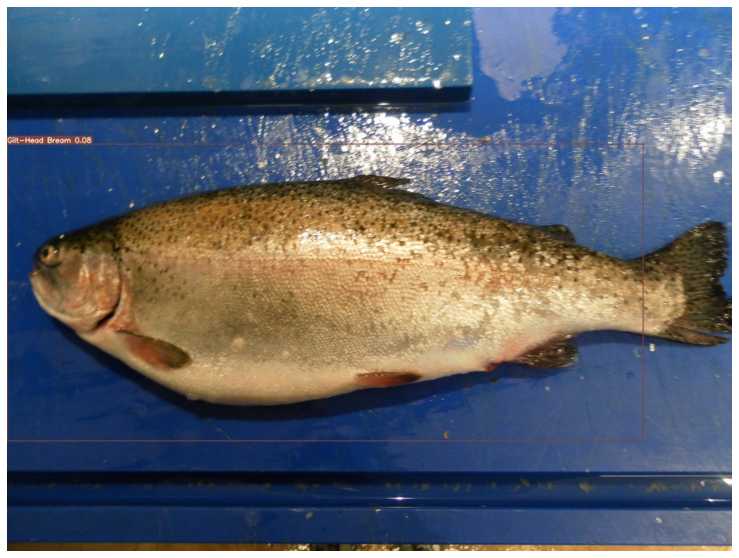

In [ ]:
imShow("runs/detect/exp50/8.png")

In [ ]:
#Trout - BSS
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/8.png --save-txt --no-trace
#
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/41.png --save-txt --no-trace
#
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/50.png --save-txt --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/8.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Gilt-Head Bream, Done. (18.3ms) Inference, (1.6ms) NMS
 The image with the result is saved in: runs/de

In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection/yolov7


In [ ]:
!python detect_custom.py --weights model/best.pt --conf 0.05 --img-size 640 --source data/val/images/23.png --save-txt --no-trace

Namespace(weights=['model/best.pt'], source='data/val/images/23.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Black Sea Sprat, 1 Striped Red Mullet, Done. (18.7ms) Inference, (16.1ms) NMS
 The image with the result is saved i

In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/runs/detect


In [ ]:
def load_image():
    base_path = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/runs/detect/"
    bbox_lis = []
    dir = base_path
    label = []
    path = []
    for dirname, _,filenames in os.walk(dir):
      for ele in filenames:
        with open(base_path+"/"+ele,'r') as f:
          data = f.readlines()
          bbox_lis.append(data)
    return bbox_lis
print("Appended list")

Appended list


In [ ]:
bbox_lis = load_image()

FileNotFoundError: ignored

In [ ]:
'''
x_min = (center_x - width/2) * image_width

y_min = (center_y - height/2) * image_height

x_max = (center_x + width/2) * image_width

y_max = (center_y + height/2) * image_height
'''

In [ ]:
bbox_lis

[['6 0.461287 0.532200 0.771576 0.223614'],
 ['8 0.511673 0.524150 0.967352 0.425760'],
 ['0 0.512343 0.528623 0.729875 0.248658'],
 ['1 0.544628 0.455277 0.860293 0.381038'],
 ['7 0.422977 0.428444 0.729905 0.259392'],
 ['3 0.413567 0.504472 0.641187 0.203936'],
 ['2 0.488171 0.397138 0.970518 0.293381'],
 ['7 0.393404 0.574240 0.168026 0.576029'],
 ['5 0.511673 0.529517 0.964669 0.279070'],
 ['5 0.386572 0.457961 0.773143 0.221825'],
 ['8 0.284258 0.509839 0.276386 0.940966'],
 ['0 0.566682 0.537567 0.165027 0.924866'],
 ['1 0.519088 0.491055 0.951699 0.398927'],
 ['6 0.483466 0.562612 0.850884 0.234347'],
 ['3 0.544628 0.489267 0.177435 0.767442'],
 ['7 0.472040 0.559034 0.755445 0.248658'],
 ['2 0.461959 0.415921 0.778297 0.230769'],
 ['7 0.437763 0.533989 0.697644 0.255814'],
 ['1 0.470696 0.500000 0.854916 0.402504'],
 ['3 0.529841 0.500000 0.819967 0.248658'],
 ['6 0.471368 0.483005 0.751412 0.228980'],
 ['1 0.458005 0.529517 0.889535 0.415027'],
 ['6 0.406846 0.565295 0.275563 

In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/runs/detect


In [ ]:
lis

['7 0.437209 0.405188 0.829159 0.230769']

In [ ]:
def get_dim():
  add = "/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/23.png"
  img = cv2.imread(add)
  img_height,img_width,_ = img.shape
  return img_height,img_width


In [ ]:
get_dim()

(2128, 2832)

In [ ]:
def list_imgs():
  base_path = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/runs/detect"
  for dirname,_,filenames in os.walk(base_path):
    if filenames != []:
      if filenames[0][-4:] != '.png':
        print(filenames)

In [ ]:
list_imgs()

['41.txt']
['23.txt']


In [ ]:
def load_labels():
    voc_lis = []
    bbox_lis = []
    base_path = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/runs/detect"
    image_dir = "/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs"
    dir = base_path
    label = []
    path = []
    voc_lis = []
    for dirname, _,filenames in os.walk(dir):
      if filenames != []:
        if filenames[0][-4:] != '.png':
          print(filenames)
          with open(dirname + "/" + filenames[0],'r') as f:
            data = f.readlines()
            ele = data[0].strip().split(" ")
            ele = [float(num) for num in ele]
            x_yolo = float(ele[1])
            y_yolo = float(ele[2])
            yolo_width = float(ele[3])
            yolo_height = float(ele[4])
            img_add = image_dir + "/" + filenames[0][:-4] + ".png"
            print(img_add)
            img_val = cv2.imread(img_add)
            image_height,image_width,_ = img_val.shape
            box_width = yolo_width * image_width
            box_height = yolo_height * image_height
            x_min = int(x_yolo * image_width - (box_width / 2))
            y_min = int(y_yolo * image_height - (box_height / 2))
            x_max = int(x_yolo * image_width + (box_width / 2))
            y_max = int(y_yolo * image_height + (box_height / 2))
            bbox_lis = [x_min,y_min,x_max,y_max]
            bbox_lis.append(filenames[0])
            voc_lis.append(bbox_lis)
    return voc_lis

In [ ]:
def yolo_to_opencv():
  voc_lis = []
  bbox_lis = []
  base_path = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/runs/detect"
  image_dir = "/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs"
  dir = base_path
  label = []
  path = []
  voc_lis = []
  for dirname, _,filenames in os.walk(dir):
    if filenames != []:
      if filenames[0][-4:] != '.png':
        print(filenames)
        with open(dirname + "/" + filenames[0],'r') as f:
          data = f.readlines()
          ele = data[0].strip().split(" ")
          ele = [float(num) for num in ele]
          x_yolo = float(ele[1])
          y_yolo = float(ele[2])
          yolo_width = float(ele[3])
          yolo_height = float(ele[4])
          img_add = image_dir + "/" + filenames[0][:-4] + ".png"
          print(img_add)
          img_val = cv2.imread(img_add)
          image_height,image_width,_ = img_val.shape
          box_width = yolo_width * image_width
          box_height = yolo_height * image_height
          x_final = int((x_yolo-yolo_width/2)*image_width)
          y_final = int((y_yolo-yolo_height/2)*image_height)
          w_final = int(yolo_width*image_width)
          h_final = int(yolo_height*image_height)
          bbox_lis = [x_final,y_final,w_final,h_final]
          bbox_lis.append(filenames[0])
          voc_lis.append(bbox_lis)
  return voc_lis

In [ ]:
bbox_lis = yolo_to_opencv()

['41.txt']
/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/41.png
['23.txt']
/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/23.png
['8.txt']
/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/8.png


In [ ]:
bbox_lis

[[0, 162, 915, 376, '41.txt'],
 [214, 927, 1936, 599, '23.txt'],
 [0, 193, 897, 419, '8.txt']]

Xcenter, Ycenter, width, height

In [ ]:
voc_lis = []
for lis in bbox_lis:
  ele = lis[0].strip().split(" ")
  ele = [float(num) for num in ele][1:]
  ele.append(lis[1])
  voc_lis.append(ele)
  print(ele)

AttributeError: ignored

In [ ]:
final_voc_lis = []
sub_voc_lis = []
for lis in voc_lis:
  x_min = int((lis[0] - lis[2]/2)*590*lis[2])
  y_min = int((lis[1] - lis[3]/2)*445*lis[3])
  x_max = int((lis[0] + lis[2]/2)*590*lis[2])
  y_max = int((lis[1] + lis[3]/2)*445*lis[3])
  sub_voc_lis = [x_min,y_min,x_max,y_max]
  sub_voc_lis.append(lis[4])
  final_voc_lis.append(sub_voc_lis)

In [ ]:
final_voc_lis = bbox_lis

In [ ]:
bbox_lis

[[0, 162, 914, 539, '41.txt'],
 [214, 927, 2151, 1526, '23.txt'],
 [0, 193, 898, 612, '8.txt']]

In [ ]:
import pandas as pd
final_df = pd.DataFrame(columns = ['xmin', 'ymin', 'xmax', 'ymax','name'])
for lis in final_voc_lis:
    final_df = final_df.append(pd.DataFrame([lis],
     columns=['xmin', 'ymin', 'xmax', 'ymax','name']),
     ignore_index=True)

<ipython-input-11-17042b5d6cdc>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(pd.DataFrame([lis],
<ipython-input-11-17042b5d6cdc>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(pd.DataFrame([lis],
<ipython-input-11-17042b5d6cdc>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(pd.DataFrame([lis],


In [ ]:
final_df

xmin ymin  xmax ymax    name
0    0  162   915  376  41.txt
1  214  927  1936  599  23.txt
2    0  193   897  419   8.txt

In [ ]:
final_df = pd.DataFrame({'xmin' : [50,50,50],'ymin' : [200,200,193],'xmax' : [800,800,898],'ymax' : [350,350,419],'name':['41.txt','8.txt','23.txt']})
#  [0, 193, 898, 612, '8.txt']

In [ ]:
final_df_1 = pd.DataFrame({'xmin' : [50],'ymin' : [193],'xmax': [898],'ymax': [612],'name':'23.txt'})
#  [0, 193, 898, 612, '8.txt']

In [ ]:
final_df

xmin ymin xmax ymax    name
0    0  162  914  539  41.txt
1   77  334  777  550  23.txt

In [ ]:
final_df = pd.DataFrame(columns = ['xmin', 'ymin', 'xmax', 'ymax','name'])

In [ ]:
for lis in final_voc_lis:
    final_df = final_df.append(pd.DataFrame([lis],
     columns=['xmin', 'ymin', 'xmax', 'ymax','name']),
     ignore_index=True)

<ipython-input-97-f9e862f63329>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(pd.DataFrame([lis],
<ipython-input-97-f9e862f63329>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(pd.DataFrame([lis],
<ipython-input-97-f9e862f63329>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(pd.DataFrame([lis],


# Pass through grabcut

# Final Fish Image Segmentation

In [ ]:
final_df_1

xmin  ymin  xmax  ymax    name
0    50   193   898   419  23.txt

In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection/yolov7


Image saved
(750, 750, 1500, 1000)


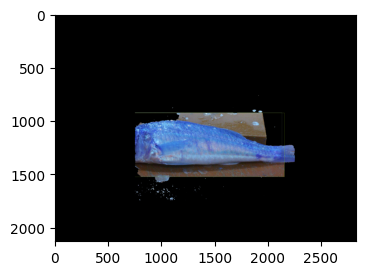

In [ ]:
plt.figure(figsize=(20,10))
for ind in final_df_1.index:
    add = "/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/"+str(final_df_1['name'][ind])[:-3]+"png"
    img = cv2.imread(add)
    print("Image saved")
    mask = np.zeros(img.shape[:2], np.uint8)

    bgmodel = np.zeros((1,65), np.float64)
    fgmodel = np.zeros((1,65),np.float64)

    rect = (750,750,1500,1000)
    print(rect)
    cv2.grabCut(img, mask, rect, bgmodel, fgmodel, 10, cv2.GC_INIT_WITH_RECT)

    # If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

    # adding additional dimension for rgb to the mask, by default it gets 1
    # multiply it with input image to get the segmented image
    image = img * mask2[:, :, np.newaxis]
    ax = plt.subplot(3,4,ind+1)  #(nrows, ncolumns, index)
    plt.imshow(image, cmap = 'gray')

Image saved
(50, 162, 915, 376)
Image saved
(264, 927, 1936, 599)
Image saved
(50, 193, 897, 419)


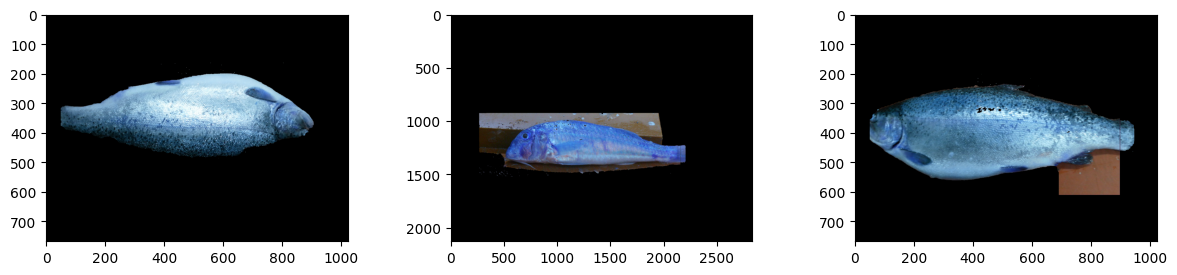

In [ ]:
plt.figure(figsize=(20,10))
for ind in final_df.index:
    add = "/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/"+str(final_df['name'][ind])[:-3]+"png"
    img = cv2.imread(add)
    print("Image saved")
    mask = np.zeros(img.shape[:2], np.uint8)

    mask[final_df['ymin'][ind]:final_df['ymax'][ind], final_df['xmin'][ind]:final_df['xmax'][ind]] = cv2.GC_FGD

    bgmodel = np.zeros((1,65), np.float64)
    fgmodel = np.zeros((1,65),np.float64)

    rect = (int(final_df['xmin'][ind])+50,int(final_df['ymin'][ind]), int(final_df['xmax'][ind]),int(final_df['ymax'][ind]))
    print(rect)
    cv2.grabCut(img, mask, rect, bgmodel, fgmodel, 10, cv2.GC_INIT_WITH_RECT)

    # If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

    # adding additional dimension for rgb to the mask, by default it gets 1
    # multiply it with input image to get the segmented image
    image = img * mask2[:, :, np.newaxis]
    ax = plt.subplot(3,4,ind+1)  #(nrows, ncolumns, index)
    plt.imshow(image, cmap = 'gray')

0
Image saved
(50, 200, 800, 350)
1
Image saved
(50, 200, 800, 350)
2
Image saved
(50, 200, 800, 350)


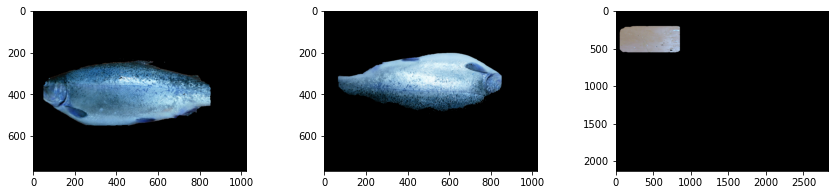

In [ ]:
plt.figure(figsize=(20,10))
for ind in final_df.index:
    print(ind)
    img = cv2.imread("runs/detect/bounded_imgs/"+str(final_df['name'][ind])[:-3]+"png")
    print("Image saved")
    mask = np.zeros(img.shape[:2], np.uint8)

    bgmodel = np.zeros((1,65), np.float64)
    fgmodel = np.zeros((1,65),np.float64)

    rect = (final_df['xmin'][ind],final_df['ymin'][ind], final_df['xmax'][ind]-final_df['xmin'][ind],final_df['ymax'][ind]-final_df['ymin'][ind])
    print(rect)
    cv2.grabCut(img, mask, rect, bgmodel, fgmodel, 5, cv2.GC_INIT_WITH_RECT)

    # If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

    # adding additional dimension for rgb to the mask, by default it gets 1
    # multiply it with input image to get the segmented image
    image = img * mask2[:, :, np.newaxis]
    ax = plt.subplot(3,4,ind+1)  #(nrows, ncolumns, index)
    plt.imshow(image, cmap = 'gray')

# End-to-end Workflow

In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection


In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/41.png --view-img --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/41.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Gilt-Head Bream, Done. (16.9ms) Inference, (1.5ms) NMS
 The image with the result is saved in: runs/d

## Run Grabcut segmentation algo

In [ ]:
import subprocess
file_count = 42

In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection


In [ ]:
cmd = "cp -p /content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/exp45/8.png /content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/"
subprocess.run(cmd,shell = True)

CompletedProcess(args='cp -p /content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/exp45/8.png /content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/', returncode=0)

In [ ]:
import pandas as pd
plt.figure(figsize=(20,10))
global_file_count = 79
def yolov7_grabcut(img_path):
  file_count = global_file_count
  print("-----Bounding Box Generation and Detection of Image-----")
  command = "python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source {0} --save-txt --no-trace".format(img_path)
  subprocess.run(command, shell=True)
  print("----------Bounding Box Generation & Detection complete!----------")
  voc_lis = []
  bbox_lis = []
  image_dir = "/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/"
  detected_img_path = "/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/exp{0}/{1}".format(file_count,img_path.split("/")[-1])
  subprocess.run("cp -p {} {}".format(detected_img_path,image_dir),shell = True)
  detected_img_dir = "/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/exp{0}".format(file_count)
  file_count = file_count+1
  dir = detected_img_dir
  label = []
  path = []
  voc_lis = []
  print("-----Procurement of Bounding Box Coordinates from Yolo to CV2 Format-----")
  for dirname, _,filenames in os.walk(dir):
    if filenames != []:
      if filenames[0][-4:] != '.png':
        print(filenames)
        with open(dirname + "/" + filenames[0],'r') as f:
          data = f.readlines()
          ele = data[0].strip().split(" ")
          ele = [float(num) for num in ele]
          x_yolo = float(ele[1])
          y_yolo = float(ele[2])
          yolo_width = float(ele[3])
          yolo_height = float(ele[4])
          img_add = image_dir + "/" + filenames[0][:-4] + ".png"
          img_val = cv2.imread(img_add)
          image_height,image_width,_ = img_val.shape
          box_width = yolo_width * image_width
          box_height = yolo_height * image_height
          x_final = int((x_yolo-yolo_width/2)*image_width)
          y_final = int((y_yolo-yolo_height/2)*image_height)
          w_final = int(yolo_width*image_width)
          h_final = int(yolo_height*image_height)
          bbox_lis = [x_final,y_final,w_final,h_final]
          bbox_lis.append(filenames[0])
          voc_lis.append(bbox_lis)
  final_voc_lis = voc_lis
  print("----------Bounding Box Coordinates found!----------")
  img = plt.imread(detected_img_path)
  plt.imshow(img)
  print("----------GrabCut Segmentation----------")
  final_df = pd.DataFrame(columns = ['xmin', 'ymin', 'xmax', 'ymax','name'])

  for lis in final_voc_lis:
      final_df = final_df.append(pd.DataFrame([lis],
      columns=['xmin', 'ymin', 'xmax', 'ymax','name']),
      ignore_index=True)
  for ind in final_df.index:
    add = "/content/drive/MyDrive/yolov5_Fish_Detection/runs/detect/bounded_imgs/"+str(final_df['name'][ind])[:-3]+"png"
    img = cv2.imread(add)
    mask = np.zeros(img.shape[:2], np.uint8)

    mask[final_df['ymin'][ind]:final_df['ymax'][ind], final_df['xmin'][ind]:final_df['xmax'][ind]] = cv2.GC_FGD

    bgmodel = np.zeros((1,65), np.float64)
    fgmodel = np.zeros((1,65),np.float64)

    rect = (int(final_df['xmin'][ind])+50,int(final_df['ymin'][ind]), int(final_df['xmax'][ind]),int(final_df['ymax'][ind]))
    print("Bounding Box Coordinates = ")
    print(rect)
    cv2.grabCut(img, mask, rect, bgmodel, fgmodel, 10, cv2.GC_INIT_WITH_RECT)

    # If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

    # adding additional dimension for rgb to the mask, by default it gets 1
    # multiply it with input image to get the segmented image
    image = img * mask2[:, :, np.newaxis]
    ax = plt.subplot(1,1,ind+1)  #(nrows, ncolumns, index)
    plt.imshow(image, cmap = 'gray')
  return 0

<Figure size 2000x1000 with 0 Axes>

Time before function:2023-05-23 10:31:59
-----Bounding Box Generation and Detection of Image-----
----------Bounding Box Generation & Detection complete!----------
-----Procurement of Bounding Box Coordinates from Yolo to CV2 Format-----
['41.txt']
----------Bounding Box Coordinates found!----------
----------GrabCut Segmentation----------
Bounding Box Coordinates = 
(50, 162, 915, 376)


<ipython-input-57-250923a33463>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(pd.DataFrame([lis],


Time after function:2023-05-23 10:32:19
Execution time: 19.70 seconds


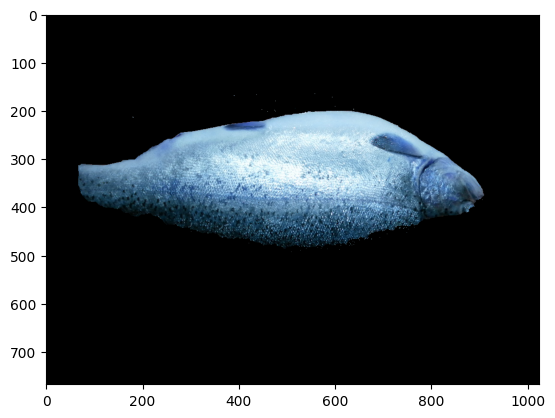

In [ ]:
import time
import datetime
before_cur_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print("Time before function:{}".format(before_cur_datetime))
start_time = time.time()
yolov7_grabcut("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/41.png")
after_cur_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print("Time after function:{}".format(after_cur_datetime))
end_time = time.time()
exec_time = end_time-start_time
print("Execution time: {:.2f} seconds".format(exec_time))

In [ ]:
!python yolov7/test.py --data yolov7/data/custom-data.yaml --img 640 --batch 8 --conf 0.001 --iou 0.65 --device 0 --weights yolov7/model/best.pt --name yolov7_640_val

Namespace(weights=['yolov7/model/best.pt'], data='yolov7/data/custom-data.yaml', batch_size=8, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='0', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='yolov7_640_val', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # t

# Final Results
## MAP value = 0.95 at 0.5
## Time taken for Yolov7 + Grabcut Algorithm for single image = 24.07s


In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection


In [ ]:
#!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --weights yolov7.pt
!python yolov7/test.py --data yolov7/data/custom-data.yaml --weights yolov7/model/best.pt --img 640 --batch-size 8 --conf-thres 0.5 --iou-thres 0.5 --augment

Namespace(weights=['yolov7/model/best.pt'], data='yolov7/data/custom-data.yaml', batch_size=8, img_size=640, conf_thres=0.5, iou_thres=0.5, task='val', device='', single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 


Traceback (most recent call last):
  File "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/test.py", line 319, in <module>
    test(opt.data,
  File "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/test.py", line 76, in test
    check_dataset(data)  # check
  File "/content/drive/MyDrive/yolo

In [ ]:
load_image()

8.png
41.png
50.png


In [ ]:
pip install subprocess.run

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for subprocess.run: filename=subprocess.run-0.0.8-py3-none-any.whl size=5336 sha256=33e609d4cfa60191935417bea0eacf7a165241ef04e95c841305c8ac3e754916
  Stored in directory: /root/.cache/pip/wheels/1e/5e/b6/33edc01d69e6253dc545cfc1a260f75a9b81afc14a0291592f
Successfully built subprocess.run


In [ ]:
from subprocess import run
run('pwd').stdout

In [ ]:
os.system('pwd')

0

In [ ]:
import os
import re
from PIL import Image
def yolo_to_voc_custom(yolo_files_folder,yolo_class_list):
  folder_holding_yolo_files = yolo_files_folder
  yolo_class_list_file = yolo_class_list

  # Get a list of all the classes used in the yolo format
  with open(yolo_class_list_file) as f:
      yolo_classes = f.readlines()
  array_of_yolo_classes = [x.strip() for x in yolo_classes]

  # Description of Yolo Format values
  # 15 0.448743 0.529142 0.051587 0.021081
  # class_number x_yolo y_yolo yolo_width yolo_height

  def is_number(n):
    try:
      float(n)
      return True
    except ValueError:
      return False

  os.chdir(folder_holding_yolo_files)

  if not os.path.exists(folder_holding_yolo_files + os.sep + 'XML'):
    # If an XML folder does not already exist, make one
    os.mkdir('XML')

  for each_yolo_file in os.listdir(folder_holding_yolo_files):
    if each_yolo_file.endswith("txt"):
      the_file = open(each_yolo_file, 'r')
      all_lines = the_file.readlines()
      image_name = each_yolo_file

      # Check to see if there is an image that matches the txt file
      if os.path.exists("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'JPG')):
        image_name = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'JPG')
      if os.path.exists("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'jpg')):
        image_name = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'jpg')
      if os.path.exists("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'png')):
        image_name = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'png')
      if os.path.exists("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'jpeg')):
        image_name = "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file.replace('txt', 'jpeg')

      if not image_name == "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/images/"+each_yolo_file:
        # If the image name is the same as the yolo filename
        # then we did NOT find an image that matches, and we will skip this code block
        print(image_name)
        orig_img = Image.open(image_name) # open the image
        image_width = orig_img.width
        image_height = orig_img.height

        # Start the XML file
        with open("/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/val/labels/XML/"+ each_yolo_file.replace('txt', 'xml'), 'w') as f:
          f.write('<annotation>\n')
          f.write('\t<folder>XML</folder>\n')
          f.write('\t<filename>' + image_name + '</filename>\n')
          f.write('\t<path>' + os.getcwd() + os.sep + image_name + '</path>\n')
          f.write('\t<source>\n')
          f.write('\t\t<database>Unknown</database>\n')
          f.write('\t</source>\n')
          f.write('\t<size>\n')
          f.write('\t\t<width>' + str(image_width) + '</width>\n')
          f.write('\t\t<height>' + str(image_height) + '</height>\n')
          f.write('\t\t<depth>3</depth>\n') # assuming a 3 channel color image (RGB)
          f.write('\t</size>\n')
          f.write('\t<segmented>0</segmented>\n')

          for each_line in all_lines:
            # regex to find the numbers in each line of the text file
            yolo_array = re.split("\s", each_line.rstrip()) # remove any extra space from the end of the line

            # initalize the variables
            class_number = 0
            x_yolo = 0.0
            y_yolo = 0.0
            yolo_width = 0.0
            yolo_height = 0.0
            yolo_array_contains_only_digits = True

            # make sure the array has the correct number of items
            if len(yolo_array) == 5:
              for each_value in yolo_array:
                # If a value is not a number, then the format is not correct, return false
                if not is_number(each_value):
                  yolo_array_contains_only_digits = False

              if yolo_array_contains_only_digits:
                # assign the variables
                class_number = int(yolo_array[0])
                object_name = array_of_yolo_classes[class_number]
                x_yolo = float(yolo_array[1])
                y_yolo = float(yolo_array[2])
                yolo_width = float(yolo_array[3])
                yolo_height = float(yolo_array[4])

                # Convert Yolo Format to Pascal VOC format
                box_width = yolo_width * image_width
                box_height = yolo_height * image_height
                x_min = str(int(x_yolo * image_width - (box_width / 2)))
                y_min = str(int(y_yolo * image_height - (box_height / 2)))
                x_max = str(int(x_yolo * image_width + (box_width / 2)))
                y_max = str(int(y_yolo * image_height + (box_height / 2)))

                # write each object to the file
                f.write('\t<object>\n')
                f.write('\t\t<name>' + object_name + '</name>\n')
                f.write('\t\t<pose>Unspecified</pose>\n')
                f.write('\t\t<truncated>0</truncated>\n')
                f.write('\t\t<difficult>0</difficult>\n')
                f.write('\t\t<bndbox>\n')
                f.write('\t\t\t<xmin>' + x_min + '</xmin>\n')
                f.write('\t\t\t<ymin>' + y_min + '</ymin>\n')
                f.write('\t\t\t<xmax>' + x_max + '</xmax>\n')
                f.write('\t\t\t<ymax>' + y_max + '</ymax>\n')
                f.write('\t\t</bndbox>\n')
                f.write('\t</object>\n')

          # Close the annotation tag once all the objects have been written to the file
          f.write('</annotation>\n')
          f.close() # Close the file

  # Check to make sure the sprite file is now in the folder
  if os.path.exists("XML"):
    print("Conversion complete")
  else:
    print("There was a problem converting the files")

In [ ]:
plt.figure(figsize=(20,10))
for ind in final_df.index:
    img = cv2.imread(path+str(final_df['image_name'][ind]))
    mask = np.zeros(img.shape[:2], np.uint8)

    bgmodel = np.zeros((1,65), np.float64)
    fgmodel = np.zeros((1,65),np.float64)

    rect = (int(final_df['xmin'][ind]), int(final_df['ymin'][ind]), int(final_df['xmax'][ind]-final_df['xmin'][ind]), int(final_df['ymax'][ind]-final_df['ymin'][ind]))
    cv2.grabCut(img, mask, rect, bgmodel, fgmodel, 5, cv2.GC_INIT_WITH_RECT)

    # If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

    # adding additional dimension for rgb to the mask, by default it gets 1
    # multiply it with input image to get the segmented image
    image = img * mask2[:, :, np.newaxis]
    ax = plt.subplot(3,4,ind+1)  #(nrows, ncolumns, index)
    plt.imshow(image, cmap = 'gray')

In [ ]:
plt.figure(figsize=(20,10))
for ind in final_df.index:
    img = cv2.imread(path+str(final_df['image_name'][ind]))
    img = cv2.rectangle(img, (int(final_df['xmin'][ind]),int(final_df['ymin'][ind])), (int(final_df['xmax'][ind]), int(final_df['ymax'][ind])), (255,0,0), 2)
    ax = plt.subplot(3,4,ind+1)  #(nrows, ncolumns, index)
    plt.imshow(img, cmap = 'gray')

In [ ]:
!ls

cfg		  figure      paper		    scripts	     utils
data		  hubconf.py  __pycache__	    test.py	     yolov7.pt
deploy		  inference   README.md		    tools
detect_custom.py  LICENSE.md  requirements_gpu.txt  traced_model.pt
detect.py	  model       requirements.txt	    train_aux.py
export.py	  models      runs		    train.py


In [ ]:
!python yolov7/detect_custom.py --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --source yolov7/data/val/images/41.png --save-txt --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/41.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 Gilt-Head Bream, Done. (18.3ms) Inference, (1.6ms) NMS
 The image with the result is saved in: runs/d

# Testing all val images - bounding box

In [ ]:
def load_image():
    base_path = "data/val/images"
    dir = base_path
    label = []
    path = []
    for dirname, _,filenames in os.walk(dir):

    return bbox_lis
print("Appended list")

In [ ]:
#!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --data data/custom-data.yaml --hyp data/hyp.scratch.custom.yaml --name yolov7-custom --cfg cfg/training/yolov7-custom.yaml --weights yolov7.pt
!python /content/drive/MyDrive/yolov5_Fish_Detectio/content/drive/MyDrive/yolov5_Fish_Detection/yolov7
n/yolov7/test.py --data /content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/custom-data.yaml --img-size 640 --conf-thres 0.01 --iou-thres 0.65 --device 0  --weights /content/drive/MyDrive/yolov5_Fish_Detection/yolov7/model/best.pt --name yolov7_640_val

Namespace(weights=['/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/model/best.pt'], data='/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/data/custom-data.yaml', batch_size=32, img_size=640, conf_thres=0.01, iou_thres=0.65, task='val', device='0', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='yolov7_640_val', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
Traceback (most recent call last):
  File "/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/utils/google_utils.py", line 26, in attempt_download
    assets = [x['name'] for x in response['assets']]  # release assets
KeyError: 'assets'

During handling of the above exception, another exception occurred:

T

# Testing

In [ ]:
!python yolov7/custom_detect.py --weights runs/train/yolov7-custom3/weights/best.pt --conf 0.5 --img-size 640 --source data/train/images/BSS_00009.png --view-img --no-trace

python3: can't open file '/content/drive/MyDrive/yolov5_Fish_Detection/yolov7/yolov7/custom_detect.py': [Errno 2] No such file or directory


In [ ]:
!python detect_custom.py --weights model/best.pt --conf 0.1 --img-size 640 --source data/val/images/10.png --view-img --no-trace

Namespace(weights=['model/best.pt'], source='data/val/images/10.png', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (18.6ms) Inference, (0.9ms) NMS
 The image with the result is saved in: runs/detect/exp20/10.png
Done. (0.861s)


In [ ]:
!sudo apt-get install libx11-xcb1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libx11-xcb1 is already the newest version (2:1.6.9-2ubuntu1.2).
libx11-xcb1 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [ ]:
!python yolov7/detect_custom.py --source yolov7/data/val/images/3.png --weights yolov7/model/best.pt --conf 0.05 --img-size 640 --view-img --no-trace

Namespace(weights=['yolov7/model/best.pt'], source='yolov7/data/val/images/3.png', img_size=640, conf_thres=0.05, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (2013.5ms) Inference, (0.8ms) NMS
 The image with the result is saved in: runs/detect/exp22/3.png
Done. (3.624s)


In [ ]:
!python detect.py --weights model/best.pt --conf 0.1 --img-size 640 --source data/val/images/10.png --view-img --no-trace

Namespace(weights=['model/best.pt'], source='data/val/images/10.png', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (40.3ms) Inference, (0.9ms) NMS
 The image with the result is saved in: runs/detect/exp19/10.png
Done. (0.867s)


In [ ]:
!python detect.py --weights runs/train/yolov7-custom/weights/last.pt --conf 0.5 --img-size 416 --source data/train/images/HM_00042.png --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='data/train/images/HM_00042.png', update=False, view_img=False, weights=['runs/train/yolov7-custom/weights/last.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36524924 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (15.4ms) Inference, (0.4ms) NMS
 The image with the result is saved in: runs

In [ ]:
!python yolov7/detect.py --weights yolov7/runs/train/yolov7-custom10/weights/best.pt --conf 0.5 --img-size 640 --source NA_Fish_Dataset/test/1.png --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='NA_Fish_Dataset/test/1.png', update=False, view_img=False, weights=['yolov7/runs/train/yolov7-custom10/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36523006 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (21.6ms) Inference, (0.5ms) NMS
 The image with the result is saved in: runs/detect/

In [ ]:
!python yolov7/detect.py --weights yolov7/runs/train/yolov7-custom10/weights/best.pt --conf 0.5 --img-size 640 --source NA_Fish_Dataset/test/1.png --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='NA_Fish_Dataset/test/1.png', update=False, view_img=False, weights=['yolov7/runs/train/yolov7-custom10/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36523006 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (18.6ms) Inference, (0.4ms) NMS
 The image with the result is saved in: runs/detect/

In [ ]:
!python yolov7/detect.py --weights yolov7/runs/train/yolov7-custom10/weights/last.pt --conf 0.5 --img-size 416 --source NA_Fish_Dataset/test/3.png --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='NA_Fish_Dataset/test/3.png', update=False, view_img=False, weights=['yolov7/runs/train/yolov7-custom10/weights/last.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36523006 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (17.6ms) Inference, (0.4ms) NMS
 The image with the result is saved in: runs/detect/

In [ ]:
!python yolov7/test.py --data data/hyp.scratch.custom.yaml --img 640 --batch 16 --conf 0.001 --iou 0.65 --device 0 --weights yolov7/runs/train/yolov7-custom10/weights/best.pt --name yolov7/data/testing

Namespace(augment=False, batch_size=16, conf_thres=0.001, data='./yolov7/data/hyp.scratch.custom.yaml', device='0', exist_ok=False, img_size=640, iou_thres=0.65, name='yolov7/data/testing', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['yolov7/runs/train/yolov7-custom10/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36523006 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

Traceback (most recent call last):
  File "yolov7/test.py", line 319, in <module>
    test(opt.data,
  File "yolov7/test.py", line 77, in test
    nc = 1 if single_cls else int(data['nc'])  # number of classes
KeyError: 'nc'


In [ ]:
res = model('yolov7/data/val/images/1.png').pandas().xyxy[0]

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
res = model('yolov7/data/train/images/00001.png').pandas().xyxy[0]

In [ ]:
res

In [ ]:
!python yolov7/detect.py --weights yolov7/runs/train/yolov7-custom10/weights/best.pt --conf 0.5 --img-size 640 --source yolov7/data/val/'Copy of 00002.png' --view-img --no-trace

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='yolov7/data/val/Copy of 00002.png', update=False, view_img=True, weights=['yolov7/runs/train/yolov7-custom10/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36523006 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (23.9ms) Inference, (0.5ms) NMS
qt.qpa.xcb: could not connect to display 
qt.q

In [ ]:
res

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []

In [ ]:
import os

train_lis_new = []

def create_txt(name):
  for current_dir, dirs, files in os.walk(f'NA_Fish_Dataset/train/{name}'):
    for file in files:
        if file.endswith('.png'):
            train_lis_new.append(f'NA_Fish_Dataset/{name}/{file}')

if __name__ == "__main__":
  for current_dir,dirs,files in os.walk('NA_Fish_Dataset/'):
   if len(dirs) != 0:
    for dir in dirs:
     create_txt(dir)


path = 'NA_Fish_Dataset/train/'
images = train_lis_new
name_dic = defaultdict(list)
final_result = pd.DataFrame()

In [ ]:
train_lis_new

['NA_Fish_Dataset/Shrimp/00043.png',
 'NA_Fish_Dataset/Shrimp/00045.png',
 'NA_Fish_Dataset/Shrimp/00044.png',
 'NA_Fish_Dataset/Shrimp/00003.png',
 'NA_Fish_Dataset/Shrimp/00001.png',
 'NA_Fish_Dataset/Shrimp/00002.png',
 'NA_Fish_Dataset/Shrimp/00009.png',
 'NA_Fish_Dataset/Shrimp/00015.png',
 'NA_Fish_Dataset/Shrimp/00027.png',
 'NA_Fish_Dataset/Shrimp/00024.png',
 'NA_Fish_Dataset/Shrimp/00018.png',
 'NA_Fish_Dataset/Shrimp/00029.png',
 'NA_Fish_Dataset/Shrimp/00010.png',
 'NA_Fish_Dataset/Shrimp/00019.png',
 'NA_Fish_Dataset/Shrimp/00013.png',
 'NA_Fish_Dataset/Shrimp/00022.png',
 'NA_Fish_Dataset/Shrimp/00016.png',
 'NA_Fish_Dataset/Shrimp/00008.png',
 'NA_Fish_Dataset/Shrimp/00025.png',
 'NA_Fish_Dataset/Shrimp/00017.png',
 'NA_Fish_Dataset/Shrimp/00006.png',
 'NA_Fish_Dataset/Shrimp/00023.png',
 'NA_Fish_Dataset/Shrimp/00028.png',
 'NA_Fish_Dataset/Shrimp/00007.png',
 'NA_Fish_Dataset/Shrimp/00012.png',
 'NA_Fish_Dataset/Shrimp/00021.png',
 'NA_Fish_Dataset/Shrimp/00046.png',
 

In [ ]:
print(res)

        xmin        ymin        xmax   ymax  confidence  class    name
0  45.799999  271.200012  811.200012  428.0    0.424072     46  banana


In [ ]:
images

['NA_Fish_Dataset/Shrimp/00043.png',
 'NA_Fish_Dataset/Shrimp/00045.png',
 'NA_Fish_Dataset/Shrimp/00044.png',
 'NA_Fish_Dataset/Shrimp/00003.png',
 'NA_Fish_Dataset/Shrimp/00001.png',
 'NA_Fish_Dataset/Shrimp/00002.png',
 'NA_Fish_Dataset/Shrimp/00009.png',
 'NA_Fish_Dataset/Shrimp/00015.png',
 'NA_Fish_Dataset/Shrimp/00027.png',
 'NA_Fish_Dataset/Shrimp/00024.png',
 'NA_Fish_Dataset/Shrimp/00018.png',
 'NA_Fish_Dataset/Shrimp/00029.png',
 'NA_Fish_Dataset/Shrimp/00010.png',
 'NA_Fish_Dataset/Shrimp/00019.png',
 'NA_Fish_Dataset/Shrimp/00013.png',
 'NA_Fish_Dataset/Shrimp/00022.png',
 'NA_Fish_Dataset/Shrimp/00016.png',
 'NA_Fish_Dataset/Shrimp/00008.png',
 'NA_Fish_Dataset/Shrimp/00025.png',
 'NA_Fish_Dataset/Shrimp/00017.png',
 'NA_Fish_Dataset/Shrimp/00006.png',
 'NA_Fish_Dataset/Shrimp/00023.png',
 'NA_Fish_Dataset/Shrimp/00028.png',
 'NA_Fish_Dataset/Shrimp/00007.png',
 'NA_Fish_Dataset/Shrimp/00012.png',
 'NA_Fish_Dataset/Shrimp/00021.png',
 'NA_Fish_Dataset/Shrimp/00046.png',
 

In [ ]:
i = 1
while i <= 12:
    img = random.choice(images)
    res = model(img).pandas().xyxy[0]
    name_dic['image_name'].append(img)
    final_result = final_result.append(res.iloc[0:1])
    i += 1

FileNotFoundError: ignored

In [ ]:
final_result.shape

In [ ]:
len(name_dic['image_name'])

In [ ]:
name_df = pd.DataFrame(name_dic)
name_df.head()

NameError: ignored

# Evaluation Mode

In [ ]:
!pwd

/content/drive/MyDrive/yolov5_Fish_Detection/yolov7


In [ ]:
import torch
from models.yolo import Model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Model(cfg='cfg/training/yolov7-custom.yaml', nc=9).to(device)
model.load_state_dict(torch.load('model/best.pt', map_location=device)['model'])
model.eval()

TypeError: ignored

In [ ]:
final_df = pd.concat([name_df, final_result.reset_index(drop = True)], axis = 1)
final_df

image_name        xmin        ymin         xmax         ymax  \
0   3c16409ab9db_14.jpg  324.786316  496.149963  1786.137329  1041.581177   
1   cafee4122080_09.jpg  585.889038  282.060730  1350.092041  1017.606201   
2   93881caf9f70_16.jpg  591.882751  378.522614  1667.760864  1049.073364   
3   d0392fd5feb6_13.jpg  187.304672  281.498810  1793.629517   959.167114   
4   9c2e82c23803_05.jpg  198.542953  507.762848  1666.262451  1002.621826   
5   0d1a9caf4350_14.jpg  296.690613  287.492554  1559.873291   867.762451   
6   304437bad7ff_14.jpg  273.464813  487.159332  1561.371826  1035.587402   
7   f1eb080c7182_02.jpg   25.098827  156.753891  1384.556152  1078.292847   
8   11acc40dc0ea_08.jpg  521.081604  311.467560  1570.362427   980.145264   
9   c9acf5847ef1_15.jpg  278.709351  227.929672  1669.259277   912.715576   
10  6cc98271f4dd_02.jpg  315.046478  282.248016  1317.126465   906.721802   
11  e8f607100c1f_16.jpg  539.812073  328.512268  1550.882690   911.217102   

    confidence  class   name  
0     0.966309      2    car  
1     0.938477      2    car  
2     0.976074      2    car  
3     0.959473      2    car  
4     0.957520      2    car  
5     0.966797      2    car  
6     0.969238      2    car  
7     0.930176      7  truck  
8     0.921387      2    car  
9     0.964355      2    car  
10    0.963379      2    car  
11    0.961914      2    car

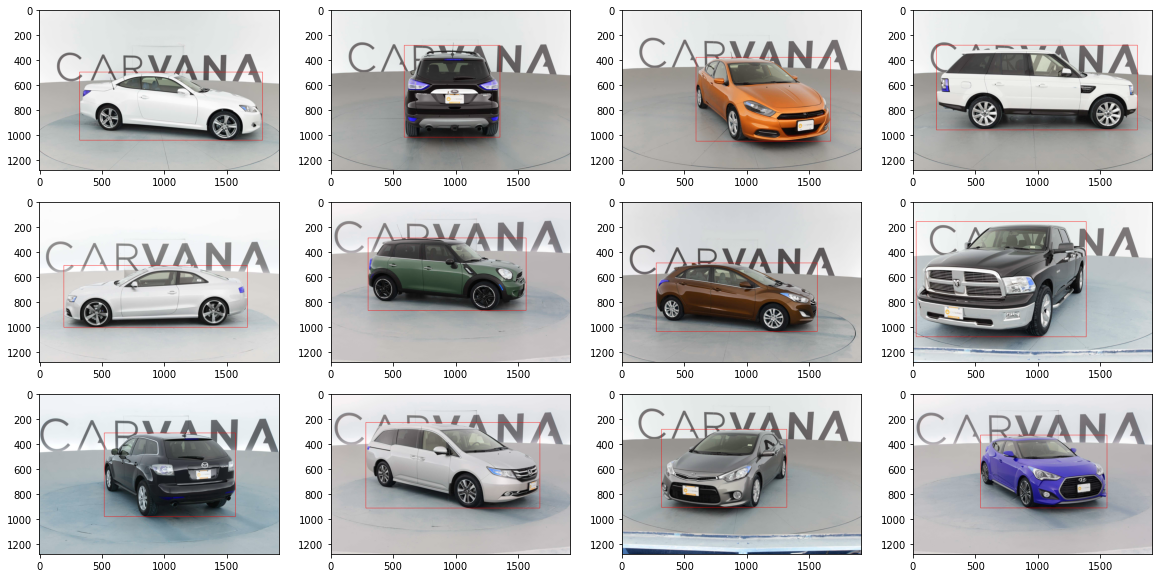

In [ ]:
plt.figure(figsize=(20,10))
for ind in final_df.index:
    img = cv2.imread(path+str(final_df['image_name'][ind]))
    img = cv2.rectangle(img, (int(final_df['xmin'][ind]),int(final_df['ymin'][ind])), (int(final_df['xmax'][ind]), int(final_df['ymax'][ind])), (255,0,0), 2)
    ax = plt.subplot(3,4,ind+1)  #(nrows, ncolumns, index)
    plt.imshow(img, cmap = 'gray')

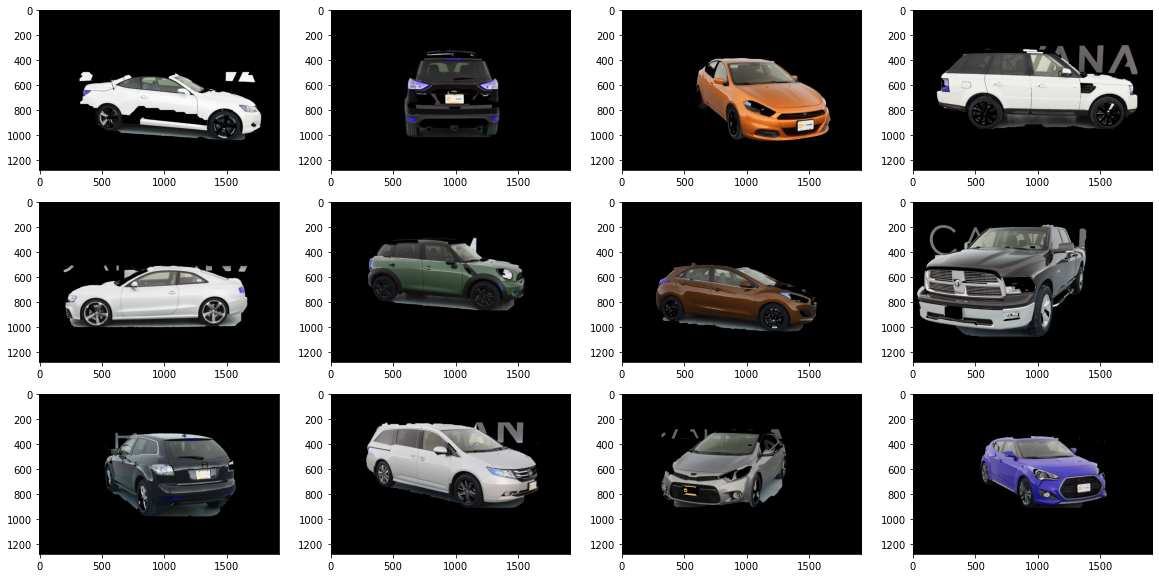

In [ ]:
plt.figure(figsize=(20,10))
for ind in final_df.index:
    img = cv2.imread(path+str(final_df['image_name'][ind]))
    mask = np.zeros(img.shape[:2], np.uint8)

    bgmodel = np.zeros((1,65), np.float64)
    fgmodel = np.zeros((1,65),np.float64)

    rect = (int(final_df['xmin'][ind]), int(final_df['ymin'][ind]), int(final_df['xmax'][ind]-final_df['xmin'][ind]), int(final_df['ymax'][ind]-final_df['ymin'][ind]))
    cv2.grabCut(img, mask, rect, bgmodel, fgmodel, 5, cv2.GC_INIT_WITH_RECT)

    # If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

    # adding additional dimension for rgb to the mask, by default it gets 1
    # multiply it with input image to get the segmented image
    image = img * mask2[:, :, np.newaxis]
    ax = plt.subplot(3,4,ind+1)  #(nrows, ncolumns, index)
    plt.imshow(image, cmap = 'gray')

In [ ]:
# This code sample uses the 'requests' library:
# http://docs.python-requests.org
import requests
from requests.auth import HTTPBasicAuth
import json

url = "https://your-domain.atlassian.net/rest/api/3/mypermissions"

auth = HTTPBasicAuth("keer2809@gmail.com", "ATATT3xFfGF0o0rfa89fd0HfBuSQEswyYV2SY3HgSJZuT4_xlZb_27gf8JxYc_W3r9FjbupB2AC1B3TGmSS2jSo7tqPXbE08bkCf0If8upFC3T-b_FNV8ZsWz5UkPLPEpJMaKEiXCSmN4rgAsXeJMPqJ4nr-fgSh5Cixy9POXsgRX0e9OSxTg6Y=FA7848C8")

headers = {
  "Accept": "application/json"
}

query = {
  'permissions': 'BROWSE_PROJECTS,EDIT_ISSUES'
}

response = requests.request(
   "GET",
   url,
   headers=headers,
   params=query,
   auth=auth
)

print(json.dumps(json.loads(response.text), sort_keys=True, indent=4, separators=(",", ": ")))

{
    "permissions": {
        "BROWSE_PROJECTS": {
            "description": "Ability to browse projects and the issues within them.",
            "havePermission": false,
            "id": "10",
            "key": "BROWSE_PROJECTS",
            "name": "Browse Projects",
            "type": "PROJECT"
        },
        "EDIT_ISSUES": {
            "description": "Ability to edit issues.",
            "havePermission": false,
            "id": "12",
            "key": "EDIT_ISSUES",
            "name": "Edit Issues",
            "type": "PROJECT"
        }
    }
}
